# Schwarshild coordinates Einstein Tensor calculations using Symbolic module - Textbook style. 

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Use plain coordinates. 



![alt-text](img/schwarschild.png "Schwarschild coords")


In [20]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v = sympy.symbols("G M F a w v")
v = 1 # vaidya - null
#a = M*(1 - F*sin(w*(syms[0] - syms[1]/v)))

a = M*(1 - F*(syms[0] + syms[1]))


mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)

# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = - (mT**2/mR**2)/(1 - 2*a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


-F*M
-F*M


⎡           -1                                                         ⎤
⎢──────────────────────────              0               0       0     ⎥
⎢  2⋅M⋅(-F⋅(r + t) + 1)                                                ⎥
⎢- ──────────────────── + 1                                            ⎥
⎢           r                                                          ⎥
⎢                                                                      ⎥
⎢                                        1                             ⎥
⎢            0               ──────────────────────────  0       0     ⎥
⎢                              2⋅M⋅(-F⋅(r + t) + 1)                    ⎥
⎢                            - ──────────────────── + 1                ⎥
⎢                                       r                              ⎥
⎢                                                                      ⎥
⎢                                                         2            ⎥
⎢            0                           0         

### Calculating the Einstein Tensor (with both indices covariant)

In [21]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                 -16.0⋅F⋅M                                       -2⋅F⋅M                                                              
⎢────────────────────────────────────────────         ───────────────────────────────                                                 
⎢r⋅(16.0⋅F⋅M⋅r + 16.0⋅F⋅M⋅t - 16.0⋅M + 8.0⋅r)         r⋅(2⋅F⋅M⋅r + 2⋅F⋅M⋅t - 2⋅M + r)                                                 
⎢                                                                                                                                     
⎢                  -2⋅F⋅M                              M⋅(16.0⋅F⋅r + 32.0⋅F⋅t - 32.0)                                                 
⎢      ───────────────────────────────         ─────────────────────────────────────────────                                          
⎢      r⋅(2⋅F⋅M⋅r + 2⋅F⋅M⋅t - 2⋅M + r)          2                                                                                     
⎢                                              r ⋅(16.0

In [22]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                                        2 ⎛   2  2    2  2            ⎞                                                              
⎢                                     2⋅M ⋅⎝- F ⋅r  + F ⋅t  - 2⋅F⋅t + 1⎠                                                              
⎢───────────────────────────────────────────────────────────────────────────────────────────────────────────                          
⎢ 2 ⎛   2  2  2      2  2          2  2  2        2          2            2                  2            2⎞                          
⎢r ⋅⎝4⋅F ⋅M ⋅r  + 8⋅F ⋅M ⋅r⋅t + 4⋅F ⋅M ⋅t  - 8⋅F⋅M ⋅r - 8⋅F⋅M ⋅t + 4⋅F⋅M⋅r  + 4⋅F⋅M⋅r⋅t + 4⋅M  - 4⋅M⋅r + r ⎠                          
⎢                                                                                                                                     
⎢                                                                                                                               ⎛ 2   
⎢                                                  -2⋅F

#Zero like it should be 


In [23]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                      

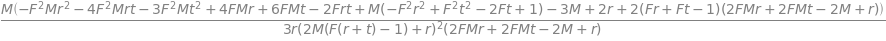

In [24]:
weyl[0,1,0,1]

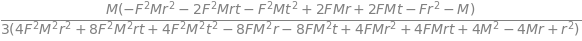

In [25]:
weyl[0,2,0,2]

(t, r, theta, phi, M)


Text(0.5, 1.0, 'T_01')

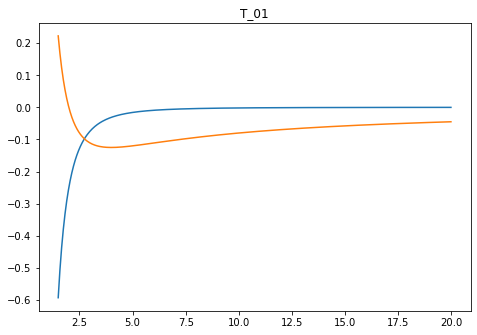

In [11]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


